In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_rec_salary_19-20')

In [3]:
tes.dtypes

NAME         object
REC           int64
REC_rank    float64
salary        int64
dtype: object

In [4]:
tes.head()

,NAME,REC,REC_rank,salary
0,Travis Kelce,97,1.0,9368400
1,Darren Waller,90,2.0,7450000
2,Zach Ertz,88,3.0,8500000
3,Tyler Higbee,64,6.0,7250000
4,Mark Andrews,62,8.0,863290


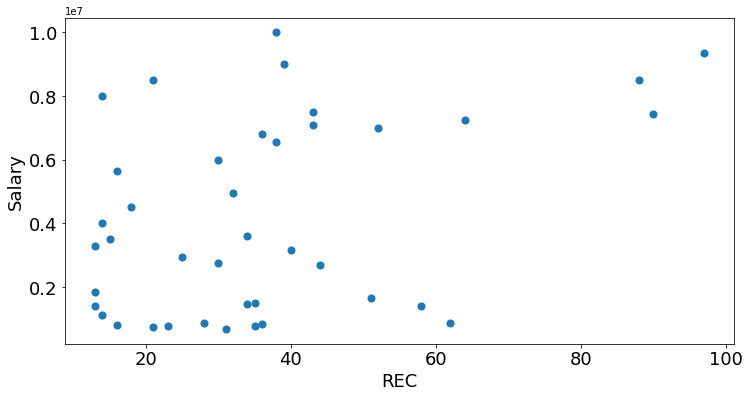

In [5]:
ax = tes.plot(kind="scatter", x = 'REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([-6.66133815e-17,  1.66533454e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.73803161,  0.22326318],
       [ 2.6572326 ,  1.43599748],
       [ 0.26088806,  1.20222489],
       [-0.51714588, -0.95739206],
       [ 0.71252728, -0.74677925]])

In [11]:
km.predict(X)

array([1, 1, 1, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,REC,REC_rank,salary,clusters
0,Travis Kelce,97,1.0,9368400,1
1,Darren Waller,90,2.0,7450000,1
2,Zach Ertz,88,3.0,8500000,1
3,Tyler Higbee,64,6.0,7250000,2
4,Mark Andrews,62,8.0,863290,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.06666667e+01, 4.83392289e+06],
       [9.16666667e+01, 8.43946667e+06],
       [4.15555556e+01, 7.74444444e+06],
       [2.52857143e+01, 1.32375243e+06],
       [5.10000000e+01, 1.94991900e+06]])

In [14]:
tes.groupby('clusters')[['REC', 'salary']].mean()

,REC,salary
clusters,,
0,20.666667,4.833923e+06
1,91.666667,8.439467e+06
2,41.555556,7.744444e+06
3,25.285714,1.323752e+06
4,51.000000,1.949919e+06


In [15]:
centroids = tes.groupby('clusters')[['REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

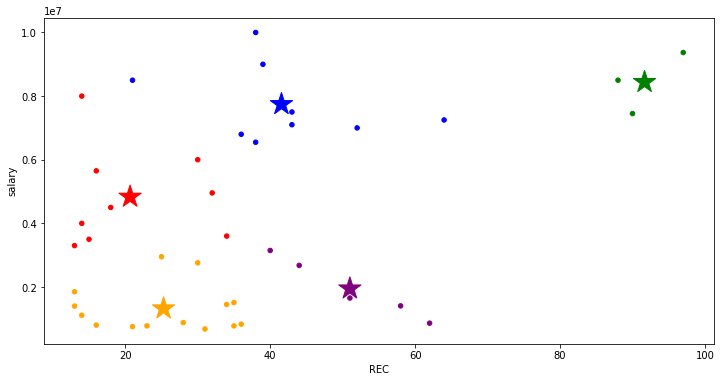

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'REC', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.756155371007317

In [18]:
silhouette_score(X, km.labels_)

0.40899039919341174